In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
arabi_genes = pd.read_csv('/data/passala/Module_paper_data/Medicago_grape_Redo_salt_pinot/medi_genes_de_results.csv', index_col= 0)
arabi_ortho = pd.read_csv('/data/passala/Module_paper_data/Medicago_grape_Redo_salt_pinot/medi_ortho_de_results.csv', index_col= 0)
tomato_genes = pd.read_csv('/data/passala/Module_paper_data/Medicago_grape_Redo_salt_pinot/grape_genes_de_results.csv', index_col= 0)
tomato_ortho = pd.read_csv('/data/passala/Module_paper_data/Medicago_grape_Redo_salt_pinot/grape_ortho_de_results.csv', index_col= 0)

In [3]:
tomato_ortho

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
10092at3193,791.883641,-0.243441,0.075861,-3.209052,0.001332,0.005550
10147at3193,911.370096,0.146456,0.072188,2.028813,0.042477,0.102834
10228at3193,1071.623953,-0.071234,0.067511,-1.055145,0.291359,0.448769
10238at3193,59.051440,-0.022967,0.260332,-0.088223,0.929700,0.960224
10488at3193,35.116653,-1.183717,0.325344,-3.638353,0.000274,0.001395
...,...,...,...,...,...,...
9828at3193,2087.074332,0.214894,0.052454,4.096818,0.000042,0.000259
9836at3193,285.177153,0.075673,0.113313,0.667823,0.504247,0.651421
9877at3193,2157.739790,0.156777,0.054960,2.852577,0.004337,0.015502
9919at3193,468.751899,-0.115229,0.089817,-1.282936,0.199514,0.340407


In [4]:
trimmed_tomato_ortho = tomato_ortho.loc[tomato_ortho.index.isin(arabi_ortho.index)]
trimmed_arabi_ortho = arabi_ortho.loc[arabi_ortho.index.isin(trimmed_tomato_ortho.index)]


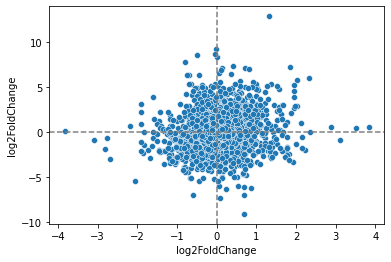

In [5]:
sns.scatterplot(x =trimmed_tomato_ortho['log2FoldChange'], y = trimmed_arabi_ortho['log2FoldChange'])
plt.axvline(0, color="grey", linestyle="--")
plt.axhline(0, color="grey", linestyle="--")

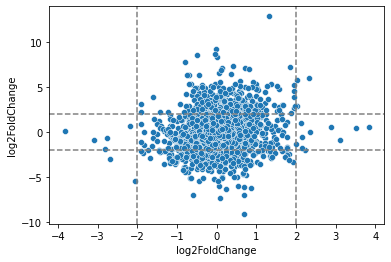

In [23]:
sns.scatterplot(x =trimmed_tomato_ortho['log2FoldChange'], y = trimmed_arabi_ortho['log2FoldChange'])
plt.axvline(2, color="grey", linestyle="--")
plt.axhline(2, color="grey", linestyle="--")
plt.axvline(-2, color="grey", linestyle="--")
plt.axhline(-2, color="grey", linestyle="--")

In [7]:
merged_result = pd.DataFrame(data = zip(trimmed_tomato_ortho['log2FoldChange'], trimmed_arabi_ortho['log2FoldChange']), columns = ['Tomato','Arabi'])
pos_thresh = 1.5
neg_thresh = -1.5
tomato_any_change = merged_result.loc[(merged_result['Tomato']>pos_thresh)|(merged_result['Tomato']<neg_thresh)]
tomato_concordant_change = merged_result.loc[((merged_result['Tomato']>pos_thresh) & (merged_result['Arabi']>pos_thresh)) | ((merged_result['Tomato']<neg_thresh) & (merged_result['Arabi']<neg_thresh))]
tomato_disconcordant_change = merged_result.loc[((merged_result['Tomato']>pos_thresh) & (merged_result['Arabi']<neg_thresh)) | ((merged_result['Tomato']<neg_thresh) & (merged_result['Arabi']>pos_thresh))]
percent_concordant_tomato = len(tomato_concordant_change)/len(tomato_any_change)
percent_non_discord_tomato = len(tomato_concordant_change)/(len(tomato_concordant_change+tomato_disconcordant_change))
print(percent_concordant_tomato)
print(percent_non_discord_tomato)


arabi_any_change = merged_result.loc[(merged_result['Arabi']>pos_thresh)|(merged_result['Arabi']<neg_thresh)]
arabi_concordant_change = merged_result.loc[((merged_result['Arabi']>pos_thresh) & (merged_result['Tomato']>pos_thresh)) | ((merged_result['Arabi']<neg_thresh) & (merged_result['Tomato']<neg_thresh))]
arabi_disconcordant_change = merged_result.loc[((merged_result['Arabi']>pos_thresh) & (merged_result['Tomato']<neg_thresh)) | ((merged_result['Arabi']<neg_thresh) & (merged_result['Tomato']>pos_thresh))]

percent_concordant_arabi = len(arabi_concordant_change)/len(arabi_any_change)
percent_non_discord_arabi = len(arabi_concordant_change)/(len(arabi_concordant_change+arabi_disconcordant_change))

print(percent_concordant_arabi)
print(percent_non_discord_arabi)

0.36486486486486486
0.627906976744186
0.018480492813141684
0.627906976744186


In [8]:
stats.spearmanr(a=trimmed_tomato_ortho['log2FoldChange'], b = trimmed_arabi_ortho['log2FoldChange'] )

SpearmanrResult(correlation=0.20044390239222, pvalue=6.879579523874182e-85)

In [9]:
arabidopsis_tomato_nm = pd.read_csv('/data/passala/OrthoDB_data/V_11_NM_with_NCBI/grape_to_medicago_ortholog_NM.csv')

In [10]:
arabidopsis_tomato_nm

,grape OrthoGene,medicago OrthoGene,Orthogroup,grape Symbol,medicago Symbol
0,29760_0:005643,3880_0:00298d,10009at3193,LOC104882588,LOC11432144
1,29760_0:005709,3880_0:00298d,10009at3193,LOC100267702,LOC11432144
2,29760_0:001162,3880_0:00042c,10092at3193,LOC100244127,LOC11432413
3,29760_0:004e38,3880_0:0050c6,10147at3193,LOC100266467,LOC11439919
4,29760_0:004e38,3880_0:007458,10147at3193,LOC100266467,LOC25502581
...,...,...,...,...,...
75736,29760_0:006214,3880_0:00388f,9942at3193,LOC100256637,LOC11426138
75737,29760_0:000cf8,3880_0:0073aa,9942at3193,LOC100241864,LOC11422618
75738,29760_0:00180e,3880_0:0073aa,9942at3193,LOC100261021,LOC11422618
75739,29760_0:006063,3880_0:0073aa,9942at3193,LOC100855403,LOC11422618


In [11]:
arabidopsis_tomato_nm = arabidopsis_tomato_nm.drop_duplicates(subset = 'medicago Symbol')
arabidopsis_tomato_nm = arabidopsis_tomato_nm.drop_duplicates(subset = 'grape Symbol')
arabidopsis_tomato_nm

,grape OrthoGene,medicago OrthoGene,Orthogroup,grape Symbol,medicago Symbol
0,29760_0:005643,3880_0:00298d,10009at3193,LOC104882588,LOC11432144
2,29760_0:001162,3880_0:00042c,10092at3193,LOC100244127,LOC11432413
3,29760_0:004e38,3880_0:0050c6,10147at3193,LOC100266467,LOC11439919
5,29760_0:005012,3880_0:006fc8,10228at3193,LOC100254135,LOC25502274
6,29760_0:001d16,3880_0:003883,10488at3193,LOC100241432,LOC11445193
...,...,...,...,...,...
75728,29760_0:00508d,3880_0:002d26,9828at3193,LOC100251827,LOC25488891
75729,29760_0:000e78,3880_0:002354,9836at3193,LOC100252520,LOC11432476
75730,29760_0:00354e,3880_0:002d72,9877at3193,LOC100255795,LOC11445289
75732,29760_0:002a0e,3880_0:00602c,9919at3193,LOC100241131,LOC11431644


In [12]:
arabi_genes_trimmed = arabi_genes.merge(how = 'inner', left_index= True, right = arabidopsis_tomato_nm[['grape Symbol','medicago Symbol']], right_on= 'medicago Symbol')
arabi_genes_trimmed = arabi_genes_trimmed.drop_duplicates(subset = 'grape Symbol', keep = False)
arabi_genes_trimmed

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,grape Symbol,medicago Symbol
21386,31.149518,-0.714431,0.457132,-1.562854,1.180869e-01,1.748064e-01,LOC100252631,LOC11432805
69200,633.257272,0.217117,0.258116,0.841159,4.002590e-01,4.880336e-01,LOC100267950,LOC11423147
6361,344.241423,-0.042212,0.171986,-0.245440,8.061161e-01,8.485883e-01,LOC100256006,LOC11434621
34310,806.891536,2.931826,0.300105,9.769339,1.524432e-22,3.170435e-21,LOC100261092,LOC25481846
68602,83.529436,-0.758143,0.305858,-2.478746,1.318453e-02,2.524561e-02,LOC104880588,LOC25481847
...,...,...,...,...,...,...,...,...
39774,98.111345,-0.244367,0.341673,-0.715208,4.744808e-01,5.597078e-01,LOC100264541,LOC25479704
66233,832.658028,-1.343911,0.248972,-5.397828,6.745245e-08,3.291254e-07,LOC100262553,LOC25494380
56560,932.032538,2.305578,0.269312,8.561006,1.118864e-17,1.582861e-16,LOC100248921,LOC25494378
21007,598.932000,-1.110845,0.323532,-3.433492,5.958604e-04,1.515651e-03,LOC100240996,LOC11409691


In [13]:
tomato_genes_trimmed = tomato_genes.merge(how = 'inner', left_index= True, right = arabidopsis_tomato_nm[['grape Symbol','medicago Symbol']], right_on= 'grape Symbol')
tomato_genes_trimmed = tomato_genes_trimmed.drop_duplicates(subset = 'medicago Symbol', keep = False)
tomato_genes_trimmed

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,grape Symbol,medicago Symbol
17331,463.016009,-0.146342,0.100491,-1.456274,1.453169e-01,2.550804e-01,LOC100257674,LOC11427264
14249,1194.390907,-0.278530,0.063201,-4.407017,1.048041e-05,6.163167e-05,LOC100254292,LOC25485777
46829,669.598078,1.197776,0.085197,14.058949,6.788675e-45,5.530966e-43,LOC100266436,LOC11436423
52814,432.576111,0.152691,0.101244,1.508156,1.315147e-01,2.361831e-01,LOC100256140,LOC25488435
56417,218.196777,0.040897,0.148755,0.274925,7.833741e-01,8.597540e-01,LOC100250986,LOC25489786
...,...,...,...,...,...,...,...,...
66777,243.937664,-0.148554,0.137953,-1.076847,2.815486e-01,4.203753e-01,LOC100253502,LOC11446732
57843,221.141273,-0.083682,0.137262,-0.609650,5.420937e-01,6.715941e-01,LOC104877790,LOC25483066
73841,475.868085,-0.085229,0.093690,-0.909695,3.629833e-01,5.052755e-01,LOC100263890,LOC11441712
27427,1097.293339,0.313513,0.065313,4.800169,1.585315e-06,1.066467e-05,LOC100260359,LOC25502432


In [14]:
tomato_genes_trimmed

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,grape Symbol,medicago Symbol
17331,463.016009,-0.146342,0.100491,-1.456274,1.453169e-01,2.550804e-01,LOC100257674,LOC11427264
14249,1194.390907,-0.278530,0.063201,-4.407017,1.048041e-05,6.163167e-05,LOC100254292,LOC25485777
46829,669.598078,1.197776,0.085197,14.058949,6.788675e-45,5.530966e-43,LOC100266436,LOC11436423
52814,432.576111,0.152691,0.101244,1.508156,1.315147e-01,2.361831e-01,LOC100256140,LOC25488435
56417,218.196777,0.040897,0.148755,0.274925,7.833741e-01,8.597540e-01,LOC100250986,LOC25489786
...,...,...,...,...,...,...,...,...
66777,243.937664,-0.148554,0.137953,-1.076847,2.815486e-01,4.203753e-01,LOC100253502,LOC11446732
57843,221.141273,-0.083682,0.137262,-0.609650,5.420937e-01,6.715941e-01,LOC104877790,LOC25483066
73841,475.868085,-0.085229,0.093690,-0.909695,3.629833e-01,5.052755e-01,LOC100263890,LOC11441712
27427,1097.293339,0.313513,0.065313,4.800169,1.585315e-06,1.066467e-05,LOC100260359,LOC25502432


In [15]:
arabi_genes_trimmed = arabi_genes_trimmed.loc[arabi_genes_trimmed['medicago Symbol'].isin(tomato_genes_trimmed['medicago Symbol'])]
tomato_genes_trimmed = tomato_genes_trimmed.loc[tomato_genes_trimmed['grape Symbol'].isin(arabi_genes_trimmed['grape Symbol'])]


In [16]:
tomato_genes_trimmed

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,grape Symbol,medicago Symbol
17331,463.016009,-0.146342,0.100491,-1.456274,1.453169e-01,2.550804e-01,LOC100257674,LOC11427264
14249,1194.390907,-0.278530,0.063201,-4.407017,1.048041e-05,6.163167e-05,LOC100254292,LOC25485777
46829,669.598078,1.197776,0.085197,14.058949,6.788675e-45,5.530966e-43,LOC100266436,LOC11436423
52814,432.576111,0.152691,0.101244,1.508156,1.315147e-01,2.361831e-01,LOC100256140,LOC25488435
56417,218.196777,0.040897,0.148755,0.274925,7.833741e-01,8.597540e-01,LOC100250986,LOC25489786
...,...,...,...,...,...,...,...,...
66777,243.937664,-0.148554,0.137953,-1.076847,2.815486e-01,4.203753e-01,LOC100253502,LOC11446732
57843,221.141273,-0.083682,0.137262,-0.609650,5.420937e-01,6.715941e-01,LOC104877790,LOC25483066
73841,475.868085,-0.085229,0.093690,-0.909695,3.629833e-01,5.052755e-01,LOC100263890,LOC11441712
27427,1097.293339,0.313513,0.065313,4.800169,1.585315e-06,1.066467e-05,LOC100260359,LOC25502432


In [17]:
tomato_genes_trimmed = (tomato_genes_trimmed.set_index('medicago Symbol')
          .reindex(arabi_genes_trimmed.set_index('medicago Symbol').index)
          .reset_index()
       )

In [18]:
tomato_genes_trimmed

,medicago Symbol,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,grape Symbol
0,LOC11432805,152.017726,3.108675,0.211808,14.676827,9.073840e-49,8.227436e-47,LOC100252631
1,LOC11423147,207.931264,0.369568,0.141277,2.615910,8.898993e-03,2.572091e-02,LOC100267950
2,LOC11434621,579.574388,0.105893,0.083991,1.260771,2.073913e-01,3.353134e-01,LOC100256006
3,LOC25481846,972.291950,-0.122205,0.070792,-1.726257,8.430122e-02,1.661597e-01,LOC100261092
4,LOC25481847,134.231523,-0.140382,0.165648,-0.847467,3.967347e-01,5.387656e-01,LOC104880588
...,...,...,...,...,...,...,...,...
8180,LOC25480527,1327.205111,0.153030,0.064210,2.383262,1.715996e-02,4.505435e-02,LOC100262851
8181,LOC25494380,376.567517,-0.354780,0.107585,-3.297663,9.749310e-04,3.708212e-03,LOC100262553
8182,LOC25494378,635.897937,0.139876,0.080287,1.742185,8.147610e-02,1.617152e-01,LOC100248921
8183,LOC11409691,412.572695,0.137996,0.096607,1.428423,1.531702e-01,2.658724e-01,LOC100240996


In [21]:
arabi_genes_trimmed = arabi_genes_trimmed.reset_index()

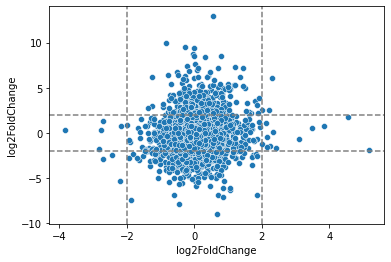

In [24]:
sns.scatterplot(x =tomato_genes_trimmed['log2FoldChange'], y = arabi_genes_trimmed['log2FoldChange'])
plt.axvline(2, color="grey", linestyle="--")
plt.axhline(2, color="grey", linestyle="--")
plt.axvline(-2, color="grey", linestyle="--")
plt.axhline(-2, color="grey", linestyle="--")

In [27]:
merged_result = pd.DataFrame(data = zip(tomato_genes_trimmed['log2FoldChange'], arabi_genes_trimmed['log2FoldChange']), columns = ['Tomato','Arabi'])
pos_thresh = 1.5
neg_thresh = -1.5
tomato_any_change = merged_result.loc[(merged_result['Tomato']>pos_thresh)|(merged_result['Tomato']<neg_thresh)]
tomato_concordant_change = merged_result.loc[((merged_result['Tomato']>pos_thresh) & (merged_result['Arabi']>pos_thresh)) | ((merged_result['Tomato']<neg_thresh) & (merged_result['Arabi']<neg_thresh))]
tomato_disconcordant_change = merged_result.loc[((merged_result['Tomato']>pos_thresh) & (merged_result['Arabi']<neg_thresh)) | ((merged_result['Tomato']<neg_thresh) & (merged_result['Arabi']>pos_thresh))]
percent_concordant_tomato = len(tomato_concordant_change)/len(tomato_any_change)
percent_non_discord_tomato = len(tomato_concordant_change)/(len(tomato_concordant_change+tomato_disconcordant_change))
print(percent_concordant_tomato)
print(percent_non_discord_tomato)


arabi_any_change = merged_result.loc[(merged_result['Arabi']>pos_thresh)|(merged_result['Arabi']<neg_thresh)]
arabi_concordant_change = merged_result.loc[((merged_result['Arabi']>pos_thresh) & (merged_result['Tomato']>pos_thresh)) | ((merged_result['Arabi']<neg_thresh) & (merged_result['Tomato']<neg_thresh))]
arabi_disconcordant_change = merged_result.loc[((merged_result['Arabi']>pos_thresh) & (merged_result['Tomato']<neg_thresh)) | ((merged_result['Arabi']<neg_thresh) & (merged_result['Tomato']>pos_thresh))]

percent_concordant_arabi = len(arabi_concordant_change)/len(arabi_any_change)
percent_non_discord_arabi = len(arabi_concordant_change)/(len(arabi_concordant_change+arabi_disconcordant_change))

print(percent_concordant_arabi)
print(percent_non_discord_arabi)

0.3561643835616438
0.7027027027027027
0.018772563176895306
0.7027027027027027


In [ ]:
stats.spearmanr(a=tomato_genes_trimmed['log2FoldChange'], b = arabi_genes_trimmed['log2FoldChange'] )

In [ ]:
down = tomato_genes_trimmed[
    (tomato_genes_trimmed["log2FoldChange"] <= -2) & (tomato_genes_trimmed["padj"] <= 0.001)
]
up = tomato_genes_trimmed[
    (tomato_genes_trimmed["log2FoldChange"] >= 2) & (tomato_genes_trimmed["padj"] <= 0.001)
]
down_arabi = arabi_genes_trimmed[
    (arabi_genes_trimmed["log2FoldChange"] <= -2)
    & (arabi_genes_trimmed["padj"] <= 0.001)
]
up_arabi = arabi_genes_trimmed[
    (arabi_genes_trimmed["log2FoldChange"] >= 2) & (arabi_genes_trimmed["padj"] <= 0.001)
]

In [ ]:
down_arabi_ortho = trimmed_arabi_ortho[
    (trimmed_arabi_ortho["log2FoldChange"] <= -2)
    & (trimmed_arabi_ortho["padj"] <= 0.001)
]
up_arabi_ortho = trimmed_arabi_ortho[
    (trimmed_arabi_ortho["log2FoldChange"] >= 2) & (trimmed_arabi_ortho["padj"] <= 0.001)]

down_ortho = trimmed_tomato_ortho[
    (trimmed_tomato_ortho["log2FoldChange"] <= -2) & (trimmed_tomato_ortho["padj"] <= 0.001)
]
up_ortho = trimmed_tomato_ortho[
    (trimmed_tomato_ortho["log2FoldChange"] >= 2) & (trimmed_tomato_ortho["padj"] <= 0.001)
]

In [ ]:
len(up_arabi_ortho.merge(how = "inner", right_index = True, left_index= True, right = up_ortho))

In [ ]:
up_ortho

In [ ]:
up_arabi_ortho

In [ ]:
up

In [ ]:
up_arabi

In [ ]:
up_arabi.merge(how = "inner", on = 'arabidopsis Symbol', right = up)